# Exploratory Data Analysis

## Global

在Global里面导packages和define一些常用的variable

然后在各自的section里面尝试EDA

这样可以统一命名，希望不会有merge conflict

另外, [nbdime](https://nbdime.readthedocs.io/en/latest/index.html)看起来像是一个可以帮助解决merge conflict的东西，可以试一试

General [merge conflict solution](http://allendowney.github.io/amgit/conflict.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
!ls dataSets/training

links (table 3).csv                volume(table 6)_training.csv
routes (table 4).csv               weather (table 7)_training.csv
trajectories(table 5)_training.csv


In [3]:
training_path1 = "dataSets/training/"
links = pd.read_csv(training_path1+'links (table 3).csv')
volume = pd.read_csv(training_path1+'volume(table 6)_training.csv')
routes = pd.read_csv(training_path1+'routes (table 4).csv')
weather = pd.read_csv(training_path1+'weather (table 7)_training.csv')
trajectories = pd.read_csv(training_path1+'trajectories(table 5)_training.csv')

## Muci's Section

In [4]:
training_path1 = "dataSets/training/"
links = pd.read_csv(training_path1+'links (table 3).csv')
print(links.shape)
print(links.info())
links.head()

(24, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
link_id       24 non-null int64
length        24 non-null int64
width         24 non-null int64
lanes         24 non-null int64
in_top        21 non-null object
out_top       21 non-null object
lane_width    24 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.4+ KB
None


,link_id,length,width,lanes,in_top,out_top,lane_width
0,100,58,3,1,105,111,3
1,101,84,3,1,116,121,3
2,102,131,9,3,115,109,3
3,103,23,12,4,111,"122,116",3
4,104,293,9,3,109,112,3


In [5]:
volume = pd.read_csv(training_path1+'volume(table 6)_training.csv')
print(volume.shape)
print(volume.info())
volume.head()

(543699, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543699 entries, 0 to 543698
Data columns (total 6 columns):
time             543699 non-null object
tollgate_id      543699 non-null int64
direction        543699 non-null int64
vehicle_model    543699 non-null int64
has_etc          543699 non-null int64
vehicle_type     212710 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 24.9+ MB
None


,time,tollgate_id,direction,vehicle_model,has_etc,vehicle_type
0,2016-09-19 23:09:25,2,0,1,0,NaN
1,2016-09-19 23:11:53,2,0,1,0,NaN
2,2016-09-19 23:13:54,2,0,1,0,NaN
3,2016-09-19 23:17:48,1,0,1,1,NaN
4,2016-09-19 23:16:07,2,0,1,0,NaN


In [6]:
routes = pd.read_csv(training_path1+'routes (table 4).csv')
print(routes.shape)
print(routes.info())
routes.head()

(6, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
intersection_id    6 non-null object
tollgate_id        6 non-null int64
link_seq           6 non-null object
dtypes: int64(1), object(2)
memory usage: 216.0+ bytes
None


,intersection_id,tollgate_id,link_seq
0,A,2,"110,123,107,108,120,117"
1,A,3,"110,123,107,108,119,114,118,122"
2,B,1,"105,100,111,103,116,101,121,106,113"
3,B,3,"105,100,111,103,122"
4,C,1,"115,102,109,104,112,111,103,116,101,121,106,113"


In [7]:
weather = pd.read_csv(training_path1+'weather (table 7)_training.csv')
print(weather.shape)
print(weather.info())
weather.head()

(782, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
date              782 non-null object
hour              782 non-null int64
pressure          782 non-null float64
sea_pressure      782 non-null float64
wind_direction    782 non-null float64
wind_speed        782 non-null float64
temperature       782 non-null float64
rel_humidity      782 non-null float64
precipitation     782 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 55.1+ KB
None


,date,hour,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation
0,2016-07-01,0,1000.4,1005.3,225.0,2.1,26.4,94.0,0.0
1,2016-07-01,3,1000.5,1005.3,187.0,2.7,29.0,76.0,0.0
2,2016-07-01,6,998.9,1003.7,212.0,2.9,31.7,67.0,0.0
3,2016-07-01,9,998.7,1003.5,244.0,2.7,31.6,59.0,0.0
4,2016-07-01,12,999.7,1004.5,222.0,1.3,29.9,68.0,0.0


In [8]:
trajectories = pd.read_csv(training_path1+'trajectories(table 5)_training.csv')
print(trajectories.shape)
print(trajectories.info())
trajectories.head()

(109244, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109244 entries, 0 to 109243
Data columns (total 6 columns):
intersection_id    109244 non-null object
tollgate_id        109244 non-null int64
vehicle_id         109244 non-null int64
starting_time      109244 non-null object
travel_seq         109244 non-null object
travel_time        109244 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.0+ MB
None


,intersection_id,tollgate_id,vehicle_id,starting_time,travel_seq,travel_time
0,B,3,1065642,2016-07-19 00:14:24,105#2016-07-19 00:14:24#9.56;100#2016-07-19 00...,70.85
1,B,3,1047198,2016-07-19 00:35:56,105#2016-07-19 00:35:56#11.58;100#2016-07-19 0...,148.79
2,B,1,1086390,2016-07-19 00:37:15,105#2016-07-19 00:37:15#5.26;100#2016-07-19 00...,79.76
3,A,2,1071181,2016-07-19 00:37:59,110#2016-07-19 00:37:59#13.74;123#2016-07-19 0...,58.05
4,B,1,1065807,2016-07-19 00:56:21,105#2016-07-19 00:56:21#16.08;100#2016-07-19 0...,137.98


/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


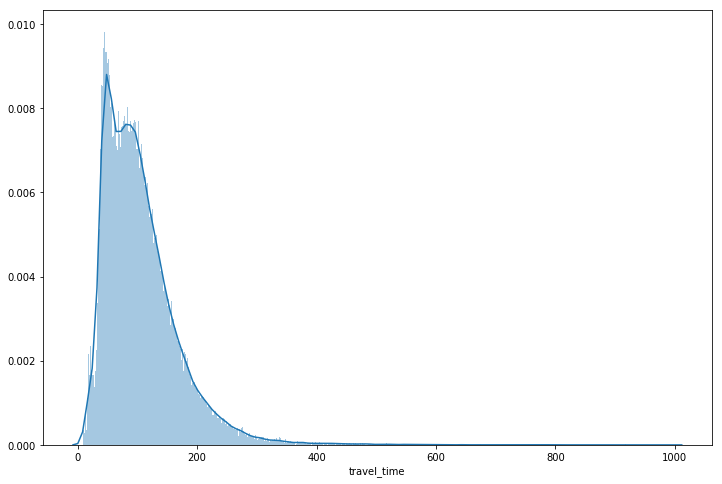

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
sns.distplot(trajectories["travel_time"][trajectories.travel_time < 1000], bins = 1000)

In [10]:
trajectories.isnull().sum()

intersection_id    0
tollgate_id        0
vehicle_id         0
starting_time      0
travel_seq         0
travel_time        0
dtype: int64

In [11]:
trajectories.shape

(109244, 6)

In [12]:
type(trajectories["starting_time"][2])

str

In [13]:
travel_seq = trajectories.travel_seq

In [14]:
len(travel_seq)

109244

In [15]:
type(range(109244))

list

- start time: 2016-07-19 00:14:24
- end time: 2016-10-17 23:56:52
- 131,022 minutes (rounded down)
- 26205 time slot

In [16]:
def get_info(seq):
    new_seq = [[x.split('#')[0], x.split('#')[1], x.split('#')[2]] for x in seq]
    return new_seq

info = []
for i in range(len(trajectories.travel_seq)):
    seq = trajectories.travel_seq[i]. split(';')
    info_item = get_info(seq)
    info.append(info_item)

In [17]:
def get_info_tup(x):
    link_id, start_time, duration = x.split('#')[0], x.split('#')[1], x.split('#')[2]
    return link_id, start_time, duration 

In [18]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in 
       datetime_range(datetime(2016, 7, 19, 0, 14, 24), datetime(2016, 10, 17, 23, 56, 52), 
       timedelta(minutes=5))]

In [19]:
header = links.link_id
index = dts
LT_df = pd.DataFrame(columns = header, index = index)
LT_df = LT_df.fillna(0)
LT_df.index.name = 'time_slot'

In [20]:
trajectories.loc[3]['intersection_id']

'A'

In [21]:
trajectories['starting_time'] = pd.to_datetime(trajectories.starting_time)

In [22]:
trajectories.head()

,intersection_id,tollgate_id,vehicle_id,starting_time,travel_seq,travel_time
0,B,3,1065642,2016-07-19 00:14:24,105#2016-07-19 00:14:24#9.56;100#2016-07-19 00...,70.85
1,B,3,1047198,2016-07-19 00:35:56,105#2016-07-19 00:35:56#11.58;100#2016-07-19 0...,148.79
2,B,1,1086390,2016-07-19 00:37:15,105#2016-07-19 00:37:15#5.26;100#2016-07-19 00...,79.76
3,A,2,1071181,2016-07-19 00:37:59,110#2016-07-19 00:37:59#13.74;123#2016-07-19 0...,58.05
4,B,1,1065807,2016-07-19 00:56:21,105#2016-07-19 00:56:21#16.08;100#2016-07-19 0...,137.98


In [23]:
import time
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

time_interval_minutes = 5
dts = [dt for dt in 
       datetime_range(datetime(2016, 7, 19, 0, 10, 0), datetime(2016, 10, 18, 0, 0, 0), 
       timedelta(minutes=time_interval_minutes))]

start_time_sys = time.clock()

start = dts[0]
LT_matrix = [[0]*len(LT_df.columns) for _ in range(len(dts))]

same_route_cars_dict = {}
key_list = []
for i in range(len(trajectories.travel_seq)):
    seq = trajectories.travel_seq[i].split(';')
    
    #build a dict to record how many cars are starting from the same loc at each time slot
    start_loc = trajectories.loc[i]['intersection_id']
    start_time = trajectories.loc[i]['starting_time']
    start_time_slot = int((start_time - start).total_seconds()/60/time_interval_minutes)
    key = (start_time_slot, start_loc)
    key_list.append(key)
    if key not in same_route_cars_dict:   
        same_route_cars_dict[(start_time_slot, start_loc)] = 1
    else:
        same_route_cars_dict[(start_time_slot, start_loc)] += 1
        
#     for item in seq:
#         link_id, starting_time, duration = get_info_tup(item)
#         cur_time = datetime.strptime(starting_time, '%Y-%m-%d %H:%M:%S')
#         td = (cur_time - start).total_seconds()/60/time_interval_minutes
#         t_idx = int(td)
#         l_idx = int(link_id) - 100
#         LT_matrix[t_idx][l_idx] += 1

# LT_df = pd.DataFrame(LT_matrix, columns = LT_df.columns, index = dts)

print("Code Run Time: ", time.clock() - start_time_sys, "seconds")
LT_df.head(20)

('Code Run Time: ', 73.82571, 'seconds')


link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
time_slot,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-19 00:14:24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:19:24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:24:24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:29:24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:34:24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:39:24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:44:24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:49:24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:54:24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
V_matrix = [[0]*len(LT_df.columns) for _ in range(len(trajectories.vehicle_id))]
for i in range(len(trajectories.travel_seq)):
    seq = trajectories.travel_seq[i].split(';')
    for item in seq:
        link_id, starting_time, duration = get_info_tup(item)
        l_idx = int(link_id) - 100
        V_matrix[i][l_idx] += 1

V_df = pd.DataFrame(V_matrix, columns = LT_df.columns, index = trajectories.vehicle_id)

In [25]:
V_df.head()

link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,
1065642,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1047198,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1086390,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
1071181,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1065807,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0


In [26]:
tra = copy.deepcopy(trajectories)

In [27]:
tra = tra.set_index(['vehicle_id'])

In [28]:
V_df['start_time'] = tra['starting_time']

row: vehicle_id


columns: links(dummy), entry time, avg width, avg length of the link, 同行车

In [29]:
links.head()

,link_id,length,width,lanes,in_top,out_top,lane_width
0,100,58,3,1,105,111,3
1,101,84,3,1,116,121,3
2,102,131,9,3,115,109,3
3,103,23,12,4,111,"122,116",3
4,104,293,9,3,109,112,3


In [30]:
links_inds = links.set_index('link_id')

In [31]:
def avg_len_wid(x):
    inds = x[x == 1].index
    
    avg_len = 0
    avg_wid = 0
    
    for item in inds:
        #return(links_inds.loc[item])
        avg_len += links_inds.loc[item]['length']
        avg_wid += links_inds.loc[item]['width']
        
    return([avg_len/len(inds), avg_wid/len(inds)])

In [32]:
V_df.head()

link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,start_time
vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,,
1065642,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:14:24
1047198,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:35:56
1086390,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:37:15
1071181,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2016-07-19 00:37:59
1065807,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:56:21


In [ ]:
a = V_df.apply(avg_len_wid, axis = 1)

In [ ]:
avg_lens = []
avg_wids = []

for item in a:
    avg_lens.append(item[0])
    avg_wids.append(item[1])

In [ ]:
V_df['avg_wid'] = avg_wids
V_df['avg_len'] = avg_lens

In [ ]:
V_df['loc_time'] = key_list
V_df['same_route_cars'] = V_df.loc_time.apply(lambda x: same_route_cars_dict[x])
V_df['travel_time'] = trajectories.set_index('vehicle_id').travel_time
# V_df = V_df.drop(columns = ['start_time', 'loc_time'], axis = 1)
V_df.head()

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

#dropped 8 outliers that clearly have wrong wind direction data
weather = weather[weather.wind_direction <= 360]
weather_ = weather.loc[:,'pressure':'precipitation']
columns = weather_.columns
weather_ = preprocessing.normalize(weather_)
weather_ = pd.DataFrame(weather_, columns = columns)
weather_.head()

In [ ]:
def report(n, cluster):
    print("{} clusters were formed.".format(n))
    for c in range(n):
        n_ele = sum([1 for x in cluster if x == c])
        print("Cluster {} has {} elements".format(c, n_ele))

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,11)
silhouette_avg = {}
results = {}

print("For clustering method KMeans:")
for n in range_n_clusters:
    km = KMeans(n_clusters=n, random_state=123)
    km.fit(weather_)
    res = km.predict(weather_)
    results[n] = res
    silhouette_avg[n] = silhouette_score(weather_, res)

best_n = max(silhouette_avg.keys(), key=(lambda key: silhouette_avg[key]))
cluster = results[best_n]
report(best_n, cluster)

In [ ]:
weather['label'] = cluster
weather[weather.label == 0].describe()

In [ ]:
weather[weather.label == 1].describe()

In [ ]:
weather[weather.label == 2].describe()

In [ ]:
weather['date'] = weather['date'].astype(str)
weather_ = weather[weather.date >= '2016-07-19']
weather_.head()

In [ ]:
key_array = zip(zip(weather.date, weather.hour), weather.label)
weather_dict = dict(key_array)

In [ ]:
def getWeatherKey(timestamp):
    date, hour = timestamp.split(' ')[0], int(timestamp.split(' ')[1][:2])
    hour = (hour//3) * 3
    return (date, hour)

def applyWeatherDict(timestamp_serie, weather_dict):
    cluster_list = []
    for t in timestamp_serie:
        key = getWeatherKey(t)
#         print(key)
#         print(key in weather_dict)
        try:
            cluster = weather_dict[key]
        except KeyError:
            cluster = cluster_list[-1]
        cluster_list.append(cluster)
    return cluster_list

In [ ]:
V_df.start_time = V_df.start_time.astype(str)

In [ ]:
cluster_list = np.array(applyWeatherDict(V_df.start_time, weather_dict))
cluster_list

In [ ]:
V_df['weather'] = cluster_list
V_df.head()

In [ ]:
V_df.shape

In [ ]:
V_df = pd.get_dummies(V_df, columns = ['weather'])

In [ ]:
V_df = V_df.drop(columns = ['start_time', 'loc_time'], axis = 1)
V_df.head()

In [ ]:
traintest_split = int(V_df.shape[0]*0.66)
V_train = V_df.iloc[:traintest_split, :] 
V_test = V_df.iloc[traintest_split:, :]

X_train = V_train.drop(columns = {"travel_time"}, axis=1)
y_train = V_train["travel_time"]

X_test = V_test.drop(columns = {"travel_time"}, axis=1)
y_test = V_test["travel_time"]

In [ ]:
X_train_simple = V_train[["avg_wid","avg_len","same_route_cars","weather_0","weather_1","weather_2"]]
X_test_simple = V_test[["avg_wid","avg_len","same_route_cars","weather_0","weather_1","weather_2"]]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


# your code here
OS = []
MSE = []
MAE = []
for i in range(1,11):
    param_grid = {'max_depth':range(1,11)}
    rf = RandomForestRegressor(n_estimators = 12,max_depth=i)
    # gs=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
    rf.fit(X_train,y_train)
    OS.append(rf.score(X_test, y_test))
    y_pred = rf.predict(X_test)
    mse_ = mean_squared_error(y_test, y_pred)
    mae_ = mean_absolute_error(y_test, y_pred)
    
    MSE.append(mse_)
    MAE.append(mae_)

print("OS R-Square: ", np.mean(OS))
print("MSE: ", np.mean(MSE))
print("MAE: ", np.mean(MAE))

In [ ]:
MSE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


# your code here
OS = []
MSE = []
MAE = []
for i in range(1,11):
    param_grid = {'max_depth':range(1,11)}
    rf = RandomForestRegressor(n_estimators = 12,max_depth=i)
    # gs=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
    rf.fit(X_train_simple,y_train)
    OS.append(rf.score(X_test_simple, y_test))
    y_pred = rf.predict(X_test_simple)
    mse_ = mean_squared_error(y_test, y_pred)
    mae_ = mean_absolute_error(y_test, y_pred)
    
    MSE.append(mse_)
    MAE.append(mae_)

print("OS R-Square: ", np.mean(OS))
print("MSE: ", np.mean(MSE))
print("MAE: ", np.mean(MAE))

In [ ]:
import statsmodels.formula.api as smf
mod1 = smf.ols(formula=
               'travel_time ~ avg_wid+avg_len+same_route_cars+weather_0++weather_1',
              data=V_train).fit()
mod1.summary()

In [ ]:
V_df_ = V_df.copy()
V_df_['start_time'] = tra['starting_time']
car_stream = V_df_[['same_route_cars','start_time']].set_index('start_time')

In [ ]:
week_stream = car_stream.copy()
week_stream['start_time'] = week_stream.index
week_stream.head()

In [ ]:
import calendar
week_stream = car_stream.copy()
week_stream['start_time'] = week_stream.index
week_stream['day_of_week'] = week_stream['start_time'].apply(lambda x: x.weekday()) # get the weekday index, between 0 and 6
week_stream['day_of_week'] = week_stream['day_of_week'].apply(lambda x: calendar.day_name[x])
week_stream = week_stream.groupby('day_of_week').mean()

In [ ]:

weekday_sorter = [calendar.day_name[x] for x in range(0,7)]
sorterIndex = dict(zip(weekday_sorter,range(len(weekday_sorter))))
# sorterIndex
week_stream['Day_id'] = week_stream.index
week_stream['Day_id'] = week_stream['Day_id'].map(sorterIndex)
week_stream.sort_values('Day_id', inplace=True)
week_stream.head(7)

In [ ]:
V_df_ = V_df.copy()
V_df_['start_time'] = tra['starting_time']
car_stream = V_df_[['same_route_cars','start_time']].set_index('start_time')

hour_stream = car_stream[['same_route_cars']].groupby(car_stream.index.hour).mean()
day_stream = car_stream[['same_route_cars']].groupby(car_stream.index.day).mean()
# week_stream = car_stream[['same_route_cars']].groupby(car_stream.index.week).mean()

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(hour_stream.index,hour_stream['same_route_cars'], linestyle='-', linewidth=1, label='same_routes_cars')
ax.set_xticks(hour_stream.index)
plt.xlabel('hour of the day')
plt.ylabel('average same routes car')
plt.title('Car Stream by hour')
plt.savefig('plot')
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(day_stream.index,day_stream['same_route_cars'], linestyle='-', linewidth=1, label='same_routes_cars')
ax.set_xticks(day_stream.index)
plt.xlabel('day')
plt.ylabel('average same routes car')
plt.title('Car Stream by day')
plt.savefig('plot')
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(week_stream.index,week_stream['same_route_cars'], linestyle='-', linewidth=1, label='same_routes_cars')
ax.set_xticks(week_stream.index)
plt.xlabel('week day')
plt.ylabel('average same routes car')
plt.title('Car Stream by weekday')
plt.savefig('plot')
plt.tight_layout()

In [ ]:
V_df_time = V_df_.set_index('start_time')

V_df_time['vehicle_id'] = V_df_.index

In [ ]:
V_df_['day_of_week'] = V_df_['start_time'].apply(lambda x: x.weekday()) # get the weekday index, between 0 and 6
V_df_['day_of_week'] = V_df_['day_of_week'].apply(lambda x: calendar.day_name[x])


In [ ]:
V_df_['start_time'].iloc[0].day

In [ ]:
def days_of_month(timestamp):
    '''
    first -- fitst 10 days of month
    middel -- middle 10 days of month
    last -- last 10 days of month
    '''
    day = timestamp.day
    if day <= 10:
        return 'first'
    elif day > 10 and day <=20:
        return 'middel'
    else:
        return 'last'
    
def PeakOrNot(timestamp):
    '''
    peak -- 8 to 10, 14 to 16
    offpeak -- rest hours
    '''
    hour = timestamp.hour
    if (hour <= 10 and hour >= 8) or (hour <= 16 and hour >= 14):
        return 'peak'
    else:
        return 'offpeak'

In [ ]:
V_df_['part_of_month'] = V_df_['start_time'].apply(lambda x: days_of_month(x))

V_df_['PeakOrNot'] = V_df_['start_time'].apply(lambda x: PeakOrNot(x))

In [ ]:
peak_dummy = pd.get_dummies(V_df_['PeakOrNot'])
weekday_dummy = pd.get_dummies(V_df_['day_of_week'])
month_dummy = pd.get_dummies(V_df_['part_of_month'])


weekday_sorter = [calendar.day_name[x] for x in range(0,7)]

weekday_dummy = weekday_dummy[weekday_sorter]


In [ ]:
dummys = pd.concat([peak_dummy,weekday_dummy,month_dummy], axis = 1)

In [ ]:
V_df_dummy = pd.concat([V_df_, dummys],axis = 1)

In [ ]:
V_df_dummy.columns

In [ ]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston